<H3>Topics to Cover:</H3>

- Line chart
- Bar chart
- Scatter plot
- Area plot and stacked plot
- Pie chart
- Table chart
- Polar chart
- Histogram
- Lollipop chart
- Choosing the best chart
- Other libraries to explore

## Line Chart

In [20]:
import datetime
import math
import pandas as pd
import random 
import radar
from faker import Faker
fake = Faker()

def generateData(n):
    listdata = []
    start = datetime.datetime(2019, 8, 1)
    end = datetime.datetime(2019, 8, 30)
    delta = end - start
    for _ in range(n):
        date = radar.random_datetime(start='2019-08-1', stop='2019-08-30').strftime("%Y-%m-%d")
        price = round(random.uniform(900, 1000), 4)
        listdata.append([date, price])
    df = pd.DataFrame(listdata, columns = ['Date', 'Price'])
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.groupby(by='Date').mean()

    return df

In [21]:
df = generateData(50)
df.head(10)

<class 'str'>


,Price
Date,
2019-08-01,938.655900
2019-08-02,968.886800
2019-08-03,976.067700
2019-08-04,947.466650
2019-08-05,925.193867
2019-08-06,919.081500
2019-08-07,938.400500
2019-08-09,968.839450
2019-08-10,945.880767


In [22]:
import matplotlib.pyplot as plt

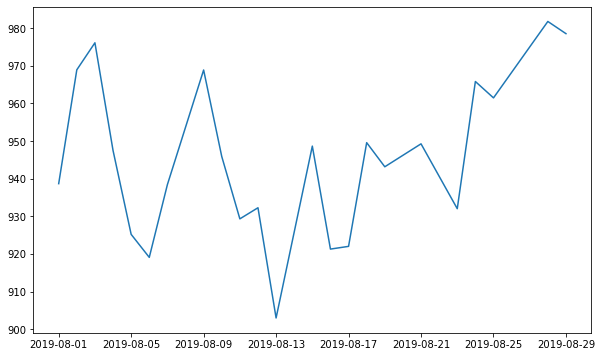

In [29]:
plt.figure(figsize=(10,6))
plt.plot(df)
plt.show()

## Bar Chart

In [30]:
import numpy as np
import calendar

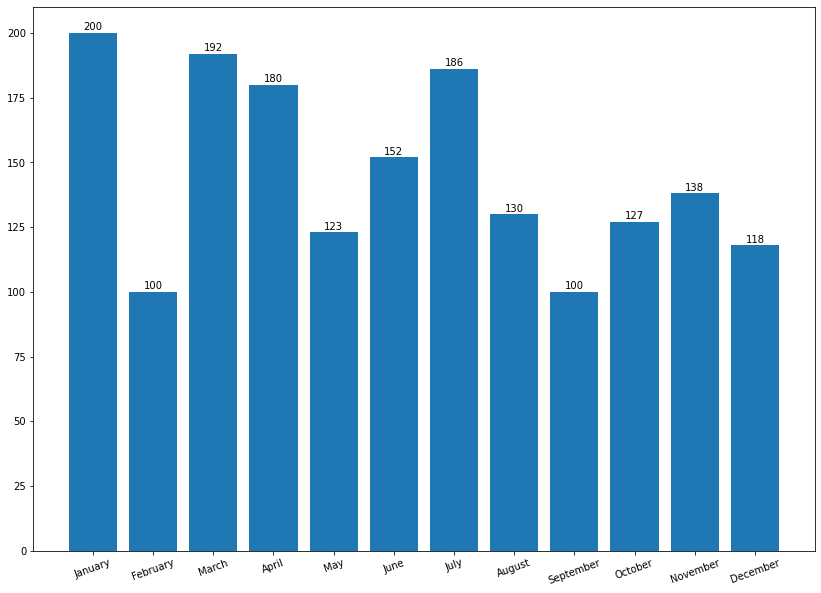

In [45]:
months = list(range(1, 13))
sold_quantity = [round(random.uniform(100, 200)) for x in range(1, 13)]

figure, axis = plt.subplots()

plt.xticks(months, calendar.month_name[1:13], rotation=20)
plot = axis.bar(months, sold_quantity)
for rectangle in plot:
    height = rectangle.get_height()
    axis.text(rectangle.get_x() + rectangle.get_width() /2., 1.002 * height, '%d' % int(height), ha='center', va = 'bottom')

plt.show()

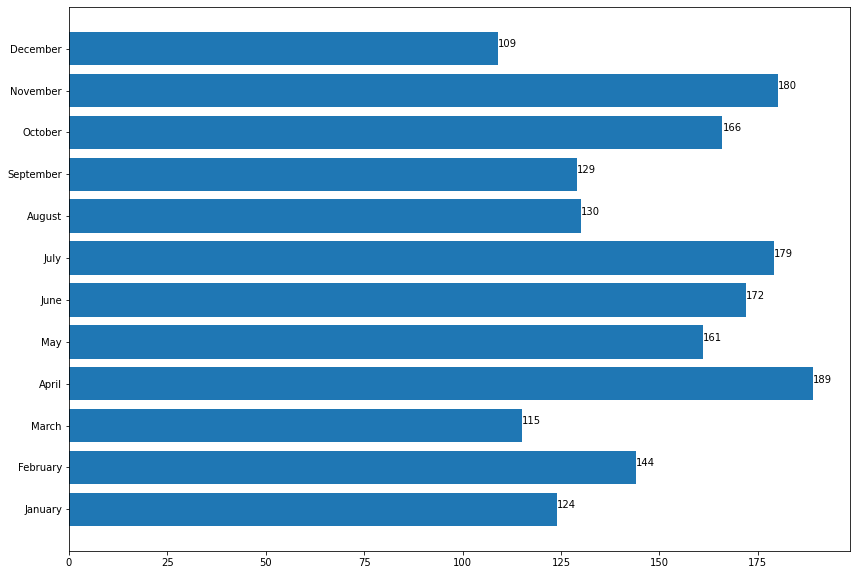

In [46]:
months = list(range(1, 13))
sold_quantity = [round(random.uniform(100, 200)) for x in range(1, 13)]

figure, axis = plt.subplots()

plt.yticks(months, calendar.month_name[1:13])
plot = axis.barh(months, sold_quantity)
for rectangle in plot:
  width = rectangle.get_width()
  axis.text(width + 2.5, rectangle.get_y() + 0.38, '%d' % int(width), ha='center', va = 'bottom')

plt.show()

## Sactter Plot

In [60]:
headers_cols = ['age','min_recommended', 'max_recommended', 'may_be_appropriate_min', 'may_be_appropriate_max', 'min_not_recommended', 'max_not_recommended'] 

sleepDf = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%202/sleep_vs_age.csv')
sleepDf.head(10)

,Unnamed: 0,age,min_recommended,max_recommended,may_be_appropriate_min,may_be_appropriate_max,min_not_recommended,max_not_recommended
0,0,0,14,17,11,13,11,19
1,1,1,14,17,11,13,11,19
2,2,2,14,17,11,13,11,19
3,3,3,14,17,11,13,11,19
4,4,4,12,15,10,11,10,18
5,5,5,12,15,10,11,10,18
6,6,6,12,15,10,11,10,18
7,7,7,12,15,10,11,10,18
8,8,8,12,15,10,11,10,18
9,9,9,12,15,10,11,10,18


In [61]:
sleepDf.describe()

,Unnamed: 0,age,min_recommended,max_recommended,may_be_appropriate_min,may_be_appropriate_max,min_not_recommended,max_not_recommended
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,361.500000,407.585635,7.553867,9.607735,6.346685,9.864641,6.346685,10.770718
std,209.145085,222.213521,1.165965,1.385859,0.823230,0.978846,0.823230,1.553980
min,0.000000,0.000000,7.000000,8.000000,5.000000,6.000000,5.000000,9.000000
25%,180.750000,225.750000,7.000000,9.000000,6.000000,10.000000,6.000000,10.000000
50%,361.500000,417.500000,7.000000,9.000000,6.000000,10.000000,6.000000,10.000000
75%,542.250000,598.250000,7.000000,9.000000,6.000000,10.000000,6.000000,11.000000
max,723.000000,779.000000,14.000000,17.000000,11.000000,13.000000,11.000000,19.000000


In [62]:
sleepDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              724 non-null    int64
 1   age                     724 non-null    int64
 2   min_recommended         724 non-null    int64
 3   max_recommended         724 non-null    int64
 4   may_be_appropriate_min  724 non-null    int64
 5   may_be_appropriate_max  724 non-null    int64
 6   min_not_recommended     724 non-null    int64
 7   max_not_recommended     724 non-null    int64
dtypes: int64(8)
memory usage: 45.4 KB


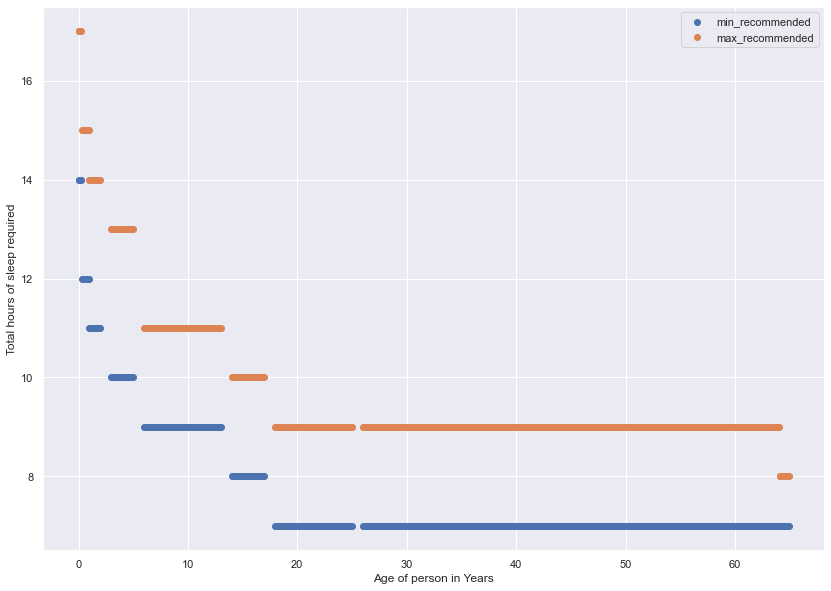

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# A regular scatter plot
plt.scatter(x=sleepDf["age"]/12., y=sleepDf["min_recommended"])
plt.scatter(x=sleepDf["age"]/12., y=sleepDf['max_recommended'])

plt.legend(["min_recommended","max_recommended"])

plt.xlabel('Age of person in Years')
plt.ylabel('Total hours of sleep required')
plt.show()

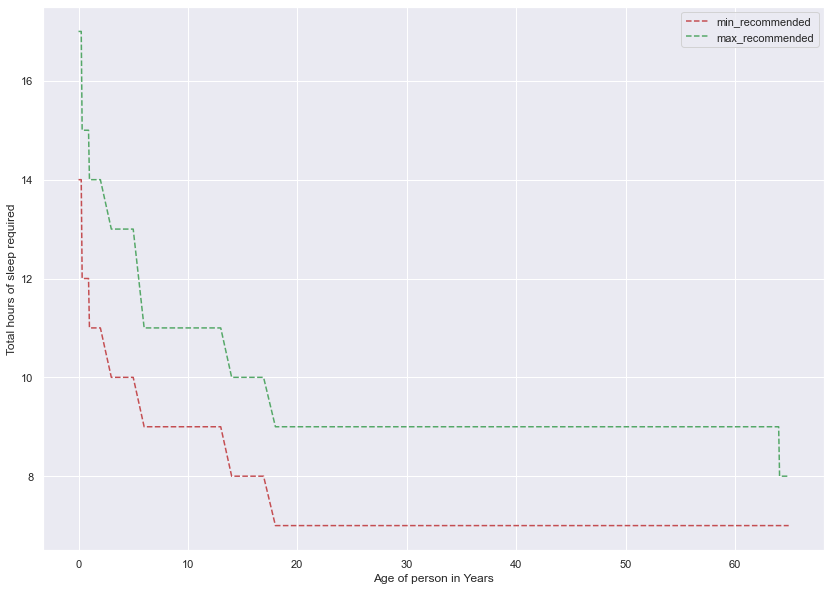

In [72]:
# Line plot
plt.plot(sleepDf['age']/12., sleepDf['min_recommended'], 'r--')
plt.plot(sleepDf['age']/12., sleepDf['max_recommended'], 'g--')

plt.legend(["min_recommended","max_recommended"])

plt.xlabel('Age of person in Years')
plt.ylabel('Total hours of sleep required')
plt.show()

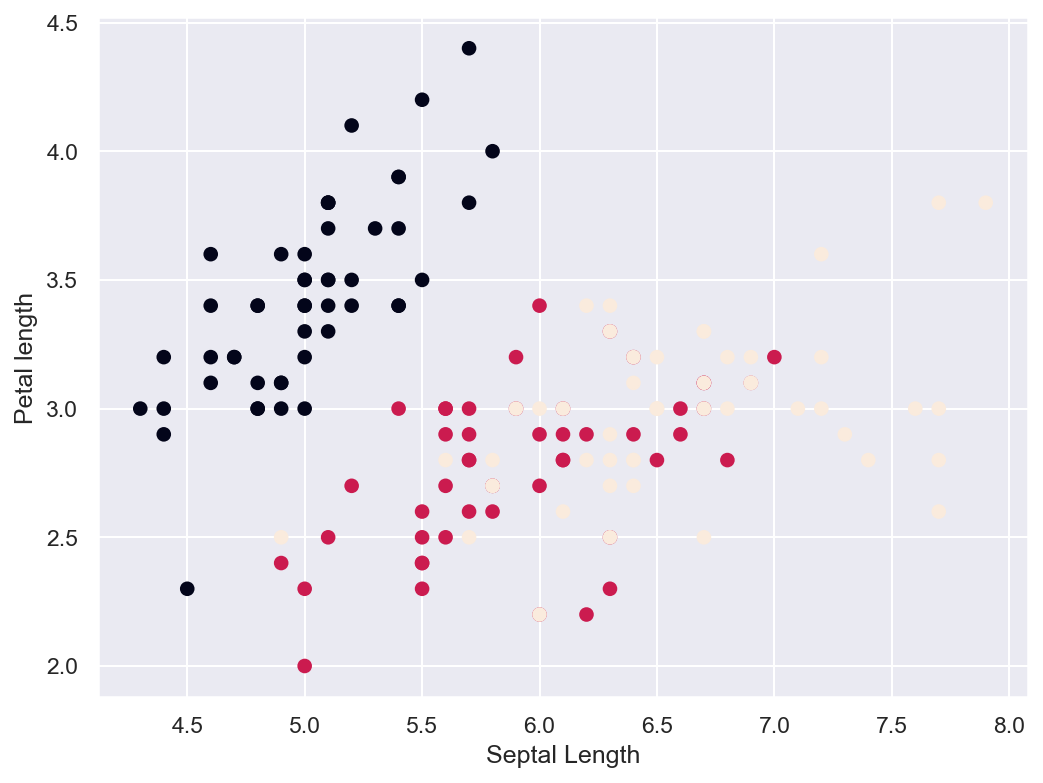

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 150

sns.set()

df = sns.load_dataset('iris')

df['species'] = df['species'].map({'setosa': 0, "versicolor": 1, "virginica": 2})
plt.scatter(x=df["sepal_length"], y=df["sepal_width"], c = df.species)

plt.xlabel('Septal Length')
plt.ylabel('Petal length')

plt.show()

## Bubble Plot

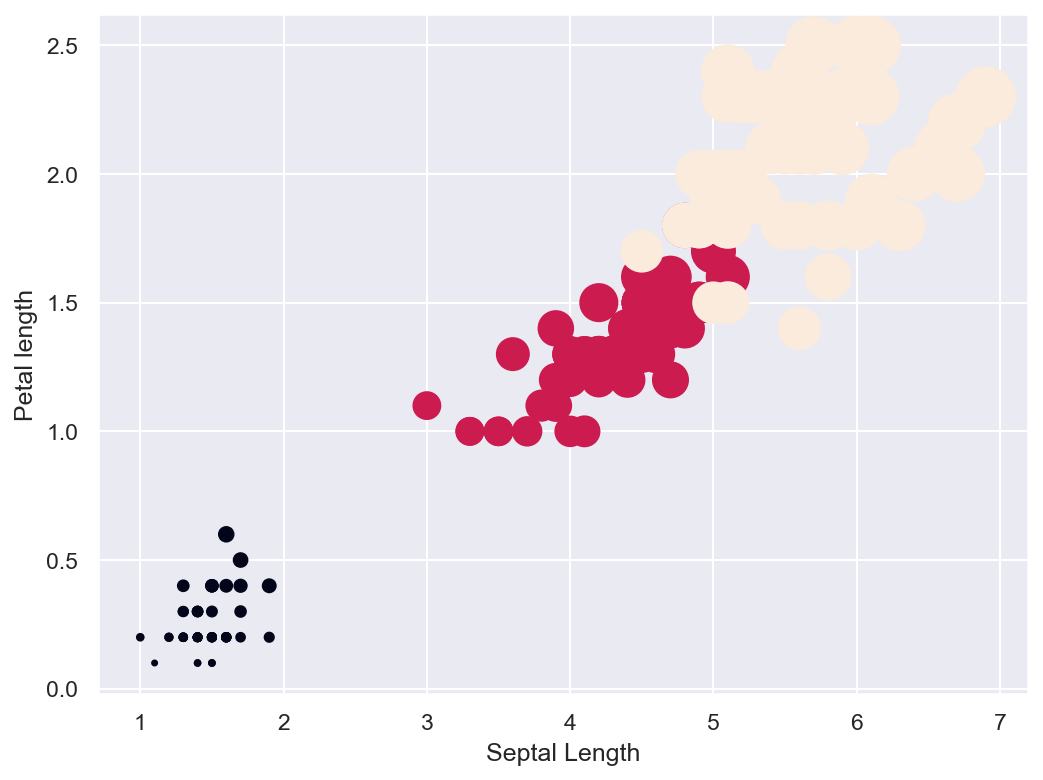

In [82]:
# Load the Iris dataset
df = sns.load_dataset('iris')

df['species'] = df['species'].map({'setosa': 0, "versicolor": 1, "virginica": 2})

# Create bubble plot
plt.scatter(df.petal_length, df.petal_width,
            s=50*df.petal_length*df.petal_width, 
            c=df.species,
            )

# Create labels for axises
plt.xlabel('Septal Length')
plt.ylabel('Petal length')
plt.show()

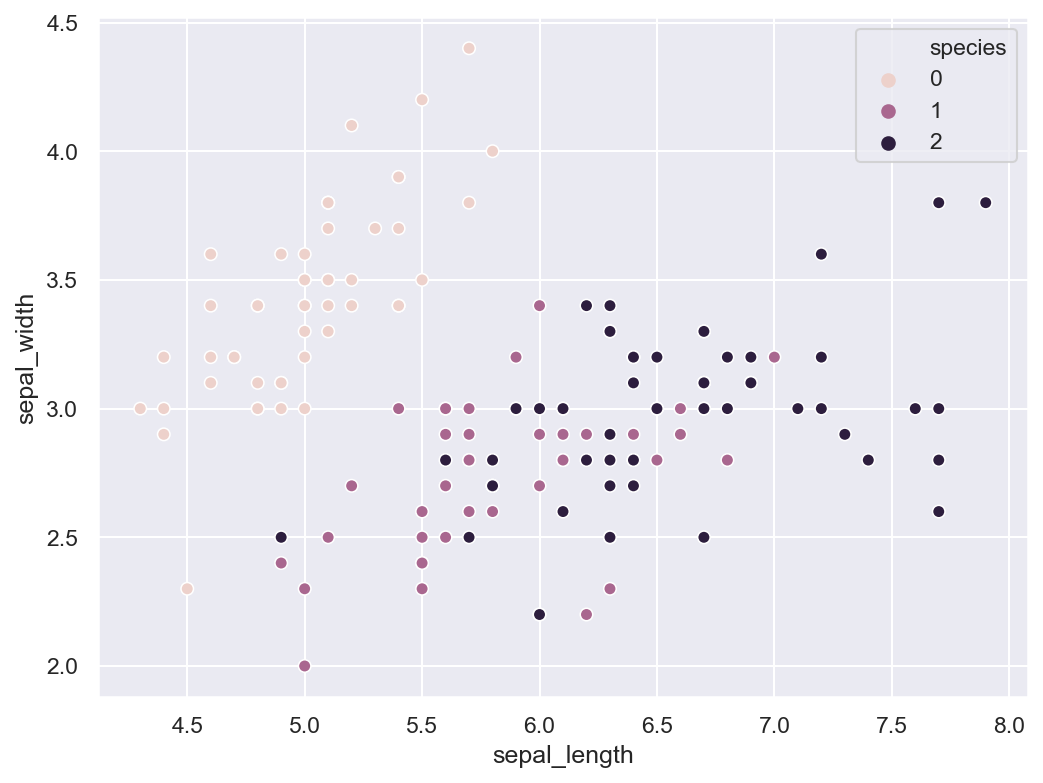

In [83]:
df = sns.load_dataset('iris')

df['species'] = df['species'].map({'setosa': 0, "versicolor": 1, "virginica": 2})
sns.scatterplot(x=df["sepal_length"], y=df["sepal_width"], hue=df.species, data=df)

## Area Plot

In [84]:
# House loan Mortgage cost per month for a year
houseLoanMortgage = [9000, 9000, 8000, 9000, 
                    8000, 9000, 9000, 9000, 
                    9000, 8000, 9000, 9000]

# Utilities Bills for a year
utilitiesBills = [4218, 4218, 4218, 4218,
                  4218, 4218, 4219, 2218, 
                  3218, 4233, 3000, 3000]
# Transportation bill for a year
transportation = [782, 900, 732, 892,
                  334, 222, 300, 800, 
                  900, 582, 596, 222]

# Car mortgage cost for one year
carMortgage = [700, 701, 702, 703, 
              704, 705, 706, 707, 
              708, 709, 710, 711]

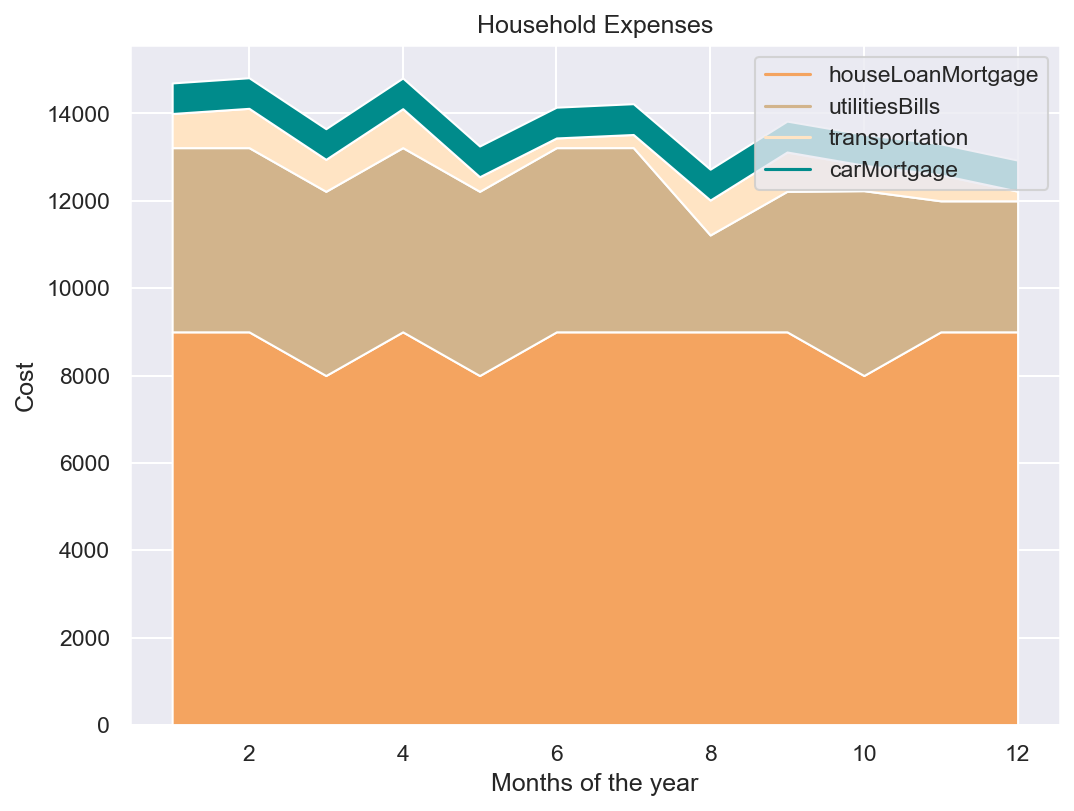

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

months= [x for x in range(1,13)]

# Create placeholders for plot and add required color 
plt.plot([],[], color='sandybrown', label='houseLoanMortgage')
plt.plot([],[], color='tan', label='utilitiesBills')
plt.plot([],[], color='bisque', label='transportation')
plt.plot([],[], color='darkcyan', label='carMortgage')

# Add stacks to the plot
plt.stackplot(months, houseLoanMortgage, utilitiesBills, transportation, carMortgage, colors=['sandybrown', 'tan', 'bisque', 'darkcyan'])
plt.legend()

# Add Labels
plt.title('Household Expenses')
plt.xlabel('Months of the year')
plt.ylabel('Cost')

# Display on the screen
plt.show()

## Pie Chart

In [90]:
# Create URL to JSON file (alternatively this can be a filepath)
url = 'https://raw.githubusercontent.com/hmcuesta/PDA_Book/master/Chapter3/pokemonByType.csv'

# Load the first sheet of the JSON file into a data frame
pokemon = pd.read_csv(url, index_col='type')

pokemon

,amount
type,
Bug,45
Dark,16
Dragon,12
Electric,7
Fighting,3
Fire,14
Ghost,10
Grass,31
Ground,17


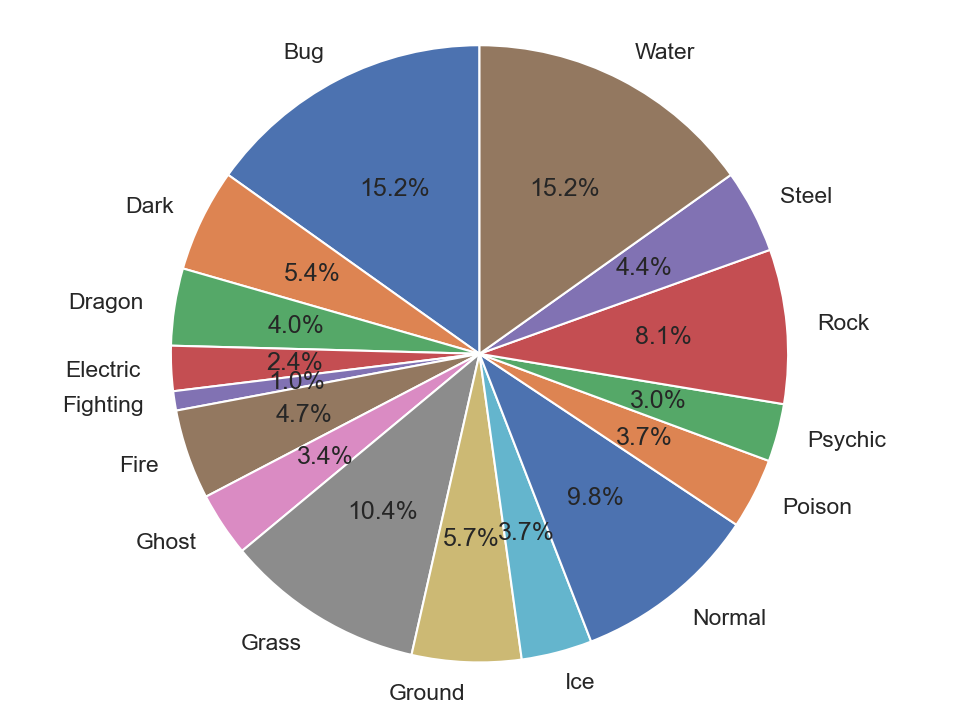

In [91]:
import matplotlib.pyplot as plt

plt.pie(pokemon['amount'], labels=pokemon.index, shadow=False, startangle=90, autopct='%1.1f%%',)
plt.axis('equal') 
plt.show()

## Table Chart

In [93]:
# Years under consideration
years = ["2010", "2011", "2012", "2013", "2014"]

# Available watt
columns = ['4.5W', '6.0W', '7.0W','8.5W','9.5W','13.5W','15W']
unitsSold = [
             [65, 141, 88, 111, 104, 71, 99],
             [85, 142, 89, 112, 103, 73, 98],
             [75, 143, 90, 113, 89, 75, 93],
             [65, 144, 91, 114, 90, 77, 92],
             [55, 145, 92, 115, 88, 79, 93],
            ]

# Define the range and scale for the y axis
values = np.arange(0, 600, 100)

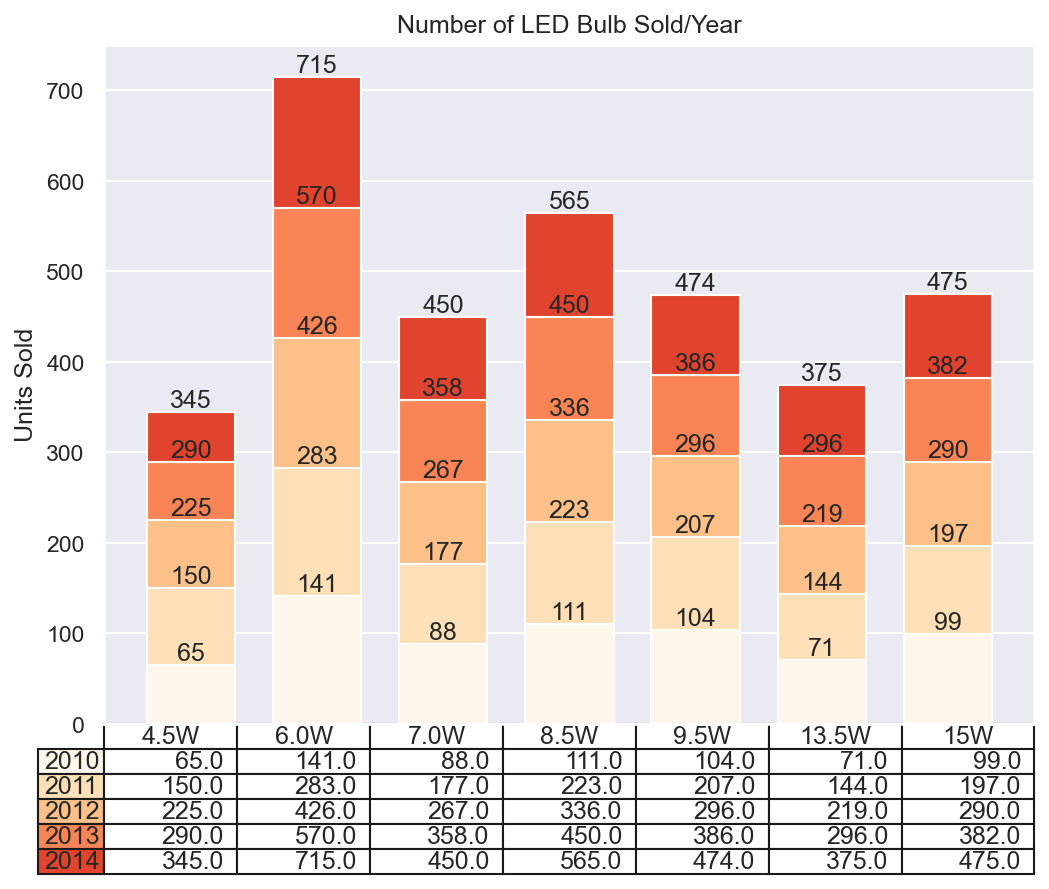

In [96]:
colors = plt.cm.OrRd(np.linspace(0, 0.7, len(years)))
index = np.arange(len(columns)) + 0.3
bar_width = 0.7

y_offset = np.zeros(len(columns))
fig, ax = plt.subplots()

cell_text = []

n_rows = len(unitsSold)
for row in range(n_rows):
    plot = plt.bar(index, unitsSold[row], bar_width, bottom=y_offset, 
                   color=colors[row])
    y_offset = y_offset + unitsSold[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
# Each iteration of this for loop, labels each bar with corresponding value for the given year
    for rect in plot:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' 
                % int(y_offset[i]), 
                ha='center', va='bottom')
        i = i+1 
        
# Add a table to the bottom of the axes
the_table = plt.table(cellText=cell_text, rowLabels=years, 
                rowColours=colors, colLabels=columns, loc='bottom')
plt.ylabel("Units Sold")
plt.xticks([])
plt.title('Number of LED Bulb Sold/Year')
plt.show()

## Polar Chart

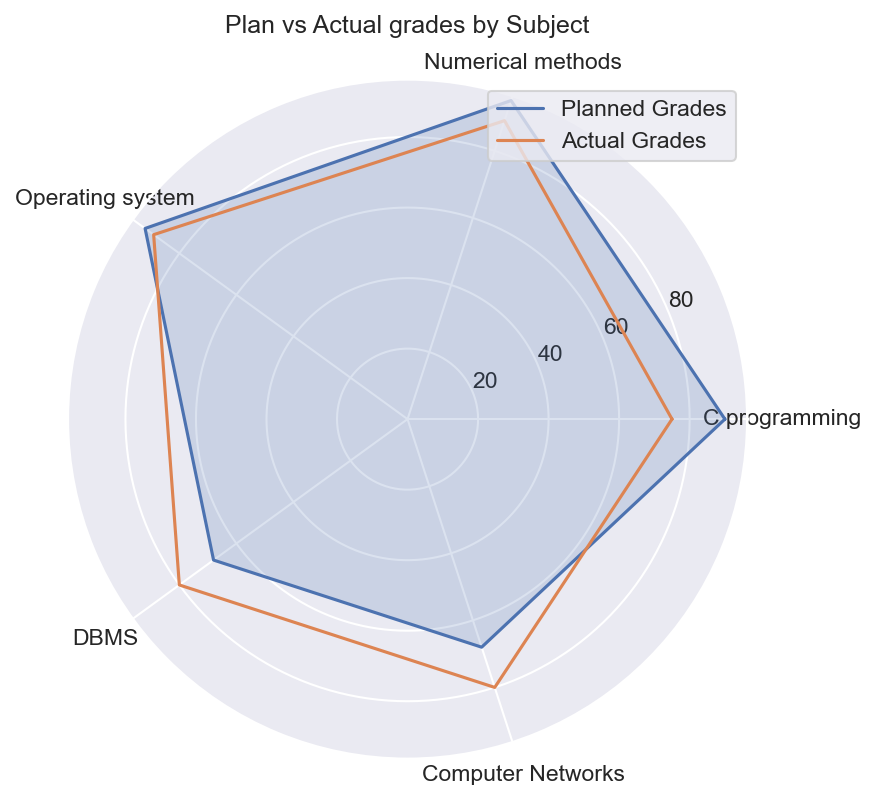

In [98]:
# create the dataset
subjects = ["C programming", "Numerical methods", "Operating system", "DBMS", "Computer Networks"]
plannedGrade = [90, 95, 92, 68, 68, 90]
actualGrade = [75, 89, 89, 80, 80, 75]

#Prepare the dataset and set up theta
theta = np.linspace(0, 2 * np.pi, len(plannedGrade))

#Initialize the plot with the figure size and polar projection
plt.figure(figsize = (10,6))
plt.subplot(polar=True)

#Getting the grid lines to align with each of the subject names
(lines,labels) = plt.thetagrids(range(0,360, int(360/len(subjects))), (subjects))

#Using the plt.plot method to plot the graph and fill the area under it
plt.plot(theta, plannedGrade)
plt.fill(theta, plannedGrade, 'b', alpha=0.2)

#plot the actual grades obtained
plt.plot(theta, actualGrade)

#add a legend and a nice comprehensible title to the plot
plt.legend(labels=('Planned Grades','Actual Grades'),loc=1)
plt.title("Plan vs Actual grades by Subject")

#show the plot on the screen
plt.show()

## Histogram Plot

In [100]:
import numpy as np
import matplotlib.pyplot as plt

#Create data set
yearsOfExperience = np.array([10, 16, 14, 5, 10, 11, 16, 14, 3, 14, 13, 19, 2, 5, 7, 3, 20,
       11, 11, 14, 2, 20, 15, 11, 1, 15, 15, 15, 2, 9, 18, 1, 17, 18,
       13, 9, 20, 13, 17, 13, 15, 17, 10, 2, 11, 8, 5, 19, 2, 4, 9,
       17, 16, 13, 18, 5, 7, 18, 15, 20, 2, 7, 0, 4, 14, 1, 14, 18,
        8, 11, 12, 2, 9, 7, 11, 2, 6, 15, 2, 14, 13, 4, 6, 15, 3,
        6, 10, 2, 11, 0, 18, 0, 13, 16, 18, 5, 14, 7, 14, 18])
yearsOfExperience

array([10, 16, 14,  5, 10, 11, 16, 14,  3, 14, 13, 19,  2,  5,  7,  3, 20,
       11, 11, 14,  2, 20, 15, 11,  1, 15, 15, 15,  2,  9, 18,  1, 17, 18,
       13,  9, 20, 13, 17, 13, 15, 17, 10,  2, 11,  8,  5, 19,  2,  4,  9,
       17, 16, 13, 18,  5,  7, 18, 15, 20,  2,  7,  0,  4, 14,  1, 14, 18,
        8, 11, 12,  2,  9,  7, 11,  2,  6, 15,  2, 14, 13,  4,  6, 15,  3,
        6, 10,  2, 11,  0, 18,  0, 13, 16, 18,  5, 14,  7, 14, 18])

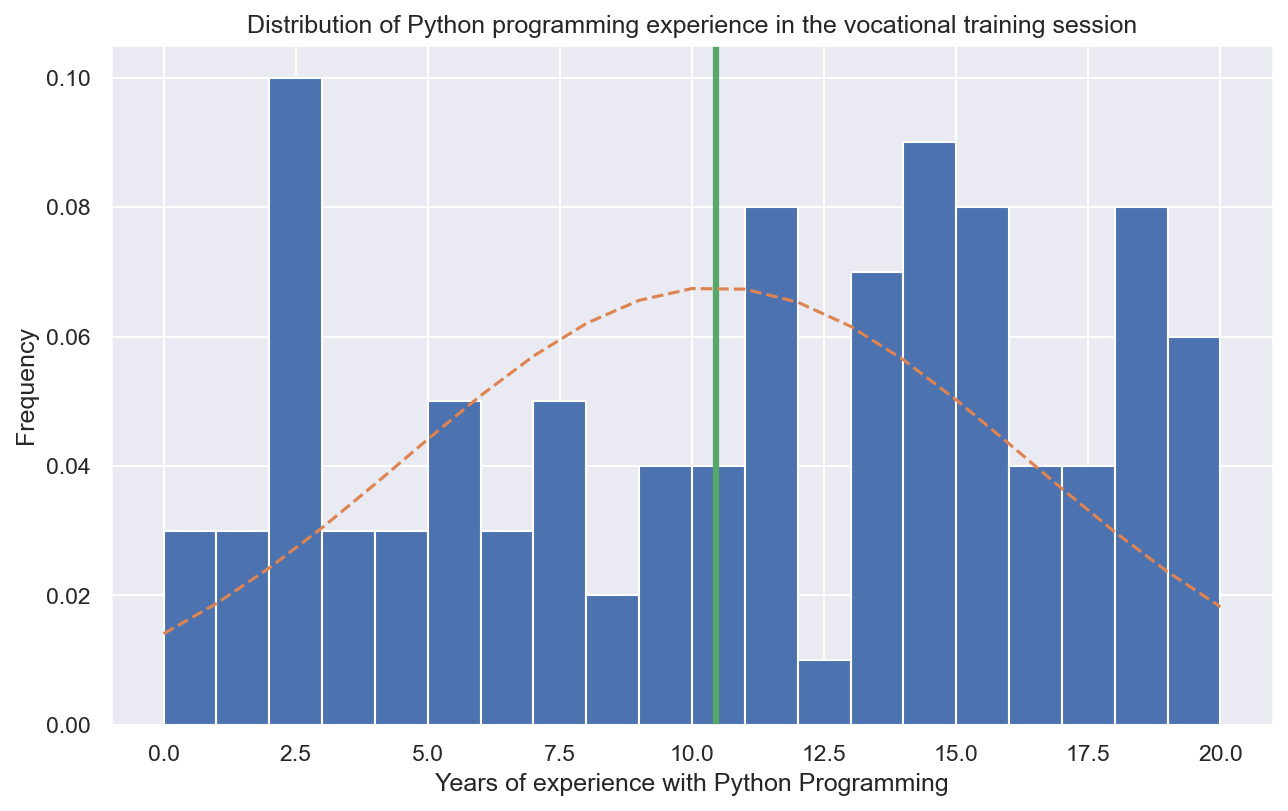

In [104]:
#Plot the distribution of group experience
plt.figure(figsize = (10,6))
nbins = 20
n, bins, patches = plt.hist(yearsOfExperience, bins=nbins, density=1)

#Add labels to the axes and a title
plt.xlabel("Years of experience with Python Programming")
plt.ylabel("Frequency")
plt.title("Distribution of Python programming experience in the vocational training session")

#Draw a green vertical line in the graph at the average experience
plt.axvline(x=yearsOfExperience.mean(), linewidth=3, color = 'g') 

#Compute the mean and standard deviation of the dataset
mu = yearsOfExperience.mean()
sigma = yearsOfExperience.std()

#Add a best-fit line for the normal distribution
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

#Plot the normal distribution
plt.plot(bins, y, '--')

plt.show()

## Lollipop Chart

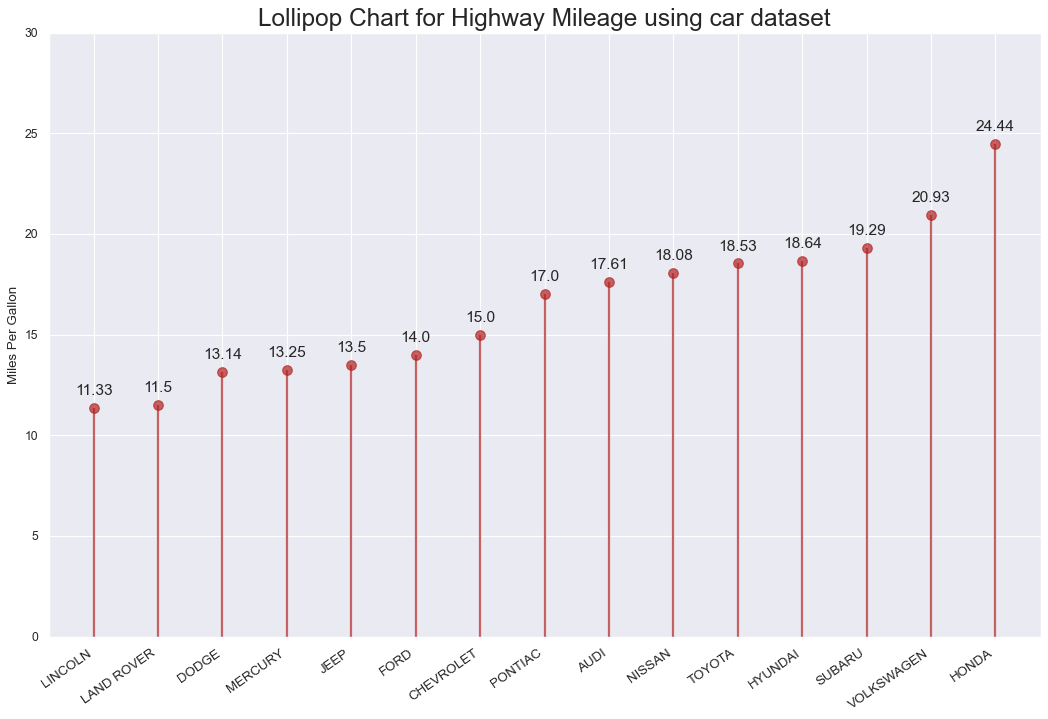

In [106]:
#Read the dataset

carDF = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%202/cardata.csv')

#Group by manufacturer and take average mileage
processedDF = carDF[['cty','manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())

#Sort the values by cty and reset index
processedDF.sort_values('cty', inplace=True)
processedDF.reset_index(inplace=True)

#Plot the graph
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=processedDF.index, ymin=0, ymax=processedDF.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=processedDF.index, y=processedDF.cty, s=75, color='firebrick', alpha=0.7)

#Annotate Title
ax.set_title('Lollipop Chart for Highway Mileage using car dataset', fontdict={'size':22})

#Annotate labels, xticks, and ylims
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(processedDF.index)
ax.set_xticklabels(processedDF.manufacturer.str.upper(), rotation=35, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

#Write the values in the plot
for row in processedDF.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

#Display the plot on the screen
plt.show()

| Purpose | Charts |
|---|---|
| Show correlation | Scatter plot,Correlogram,Pairwise plot,Jittering with strip plot,Counts plot,Marginal histogram,Scatter plot with a line of best fit,Bubble plot with circling |
| Show deviation | Area chart,Diverging bars,Diverging texts,Diverging dot plot,Diverging lollipop plot with markers |
| Show distribution | Histogram for continuous variable,Histogram for categorical variable,Density plot,Categorical plots,Density curves with histogram,Population pyramid,Violin plot,Joy plot,Distributed dot plot,Box plot |
| Show composition | Waffle chart,Pie chart,Treemap,Bar chart |
| Show change | Time series plot,Time series with peaks and troughs annotated,Autocorrelation plot,Cross-correlation plot,Multiple time series,Plotting with different scales using the secondary y axis,Stacked area chart,Seasonal plot,Calendar heat map,Area chart unstacked |
| Show groups | Dendrogram,Cluster plot,Andrews curve,Parallel coordinates |
| Show ranking | Ordered bar chart,Lollipop chart,Dot plot,Slope plot,Dumbbell plot |